In [11]:
import os
import random
import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

## Load data

In [12]:
train_folder = "Group_6_water_smooth/subsample_train"
valid_folder = "Group_6_water_smooth/valid"
test_folder = "Group_6_water_smooth/test"

# Hyper parameters
epochs = 5
batch_size = 32
input_shape = (224,224)

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode = 'sparse',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode = 'sparse',
    shuffle=False
)

val_generator = test_datagen.flow_from_directory(
    valid_folder,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode = 'sparse',
    shuffle=False
)


Found 6042 images belonging to 3 classes.
Found 2977 images belonging to 3 classes.
Found 2460 images belonging to 3 classes.


In [14]:
len(val_generator)

77

## Build model

In [15]:
model = Sequential(
    [
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224,224,3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(3, activation='softmax')

    ]
)

In [16]:
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/5


2024-03-20 19:41:22.470297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


189/189 [==============================] - ETA: 0s - loss: 1.0176 - accuracy: 0.6326

2024-03-20 19:41:43.931612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


189/189 [==============================] - 25s 121ms/step - loss: 1.0176 - accuracy: 0.6326 - val_loss: 1.2062 - val_accuracy: 0.3333
Epoch 2/5
189/189 [==============================] - 21s 112ms/step - loss: 0.7249 - accuracy: 0.6427 - val_loss: 1.9696 - val_accuracy: 0.4146
Epoch 3/5
189/189 [==============================] - 22s 115ms/step - loss: 0.7286 - accuracy: 0.6551 - val_loss: 1.2137 - val_accuracy: 0.3598
Epoch 4/5
189/189 [==============================] - 22s 115ms/step - loss: 0.7133 - accuracy: 0.6604 - val_loss: 1.1898 - val_accuracy: 0.4325
Epoch 5/5
189/189 [==============================] - 21s 113ms/step - loss: 0.8252 - accuracy: 0.6260 - val_loss: 0.9118 - val_accuracy: 0.4935


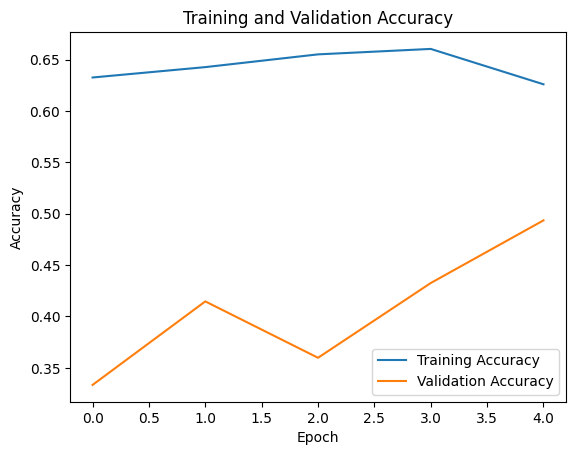

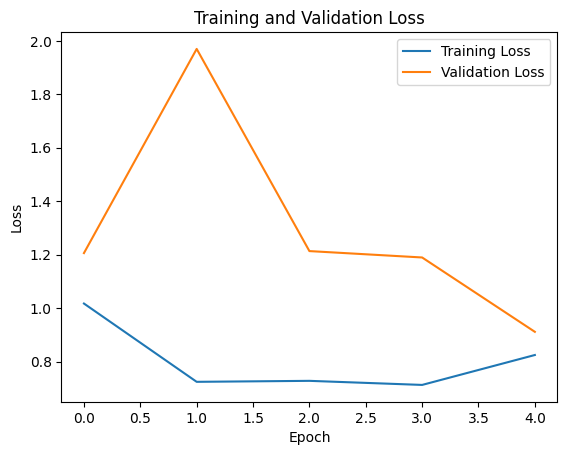

In [18]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
#test
predictions = model.predict(test_generator)
test_accuracy = accuracy_score(test_generator.classes, predictions.argmax(axis=1))
print(f"Test Accuracy: {test_accuracy:.4f}")

 4/94 [>.............................] - ETA: 2s  

2024-03-20 19:43:14.243102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 4s 32ms/step
Test Accuracy: 0.2093


In [20]:
model.save("model/baseline", save_format="tf")

INFO:tensorflow:Assets written to: model/baseline/assets


INFO:tensorflow:Assets written to: model/baseline/assets
